### Importing necessary library

In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load the CSV file

In [2]:
CSV_DataFrame = pd.read_csv("adult.csv")

In [3]:
# Classes in the data set
classes = ["<=50K", ">50K"]

### Encoding the data

In [4]:
# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# categorical_columns = ["work_class", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]

# # Iterate over each categorical column and encode its values
# for column in categorical_columns:
#     CSV_DataFrame[column] = label_encoder.fit_transform(CSV_DataFrame[column])
#     print(f"Encoded labels for column '{column}': {label_encoder.classes_}")

### Feeding the data into the model to train

In [5]:
# Separate features and target variable
X = CSV_DataFrame.drop(columns=['income'])
y = CSV_DataFrame['income']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

### With no over-sampled data

In [7]:
income_counts = y_test.value_counts()
print(income_counts)

income
0    7398
1    2256
Name: count, dtype: int64


In [8]:
random_forest_classifier = RandomForestClassifier(random_state=69)

# Train the classifier on the resampled training data
random_forest_classifier.fit(X_train, y_train)

# prediction
y_pred = random_forest_classifier.predict(X_test)

#### Evaluation Matrix and Classification Report no oversampled model

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8467992541951522


In [10]:
# Print classification report
print("Classification Report:")

actual_classes = [classes[x] for x in y_test]
predicted_classes = [classes[x] for x in y_pred]

report_dict = classification_report(actual_classes, predicted_classes, output_dict=True)
classification_df = pd.DataFrame(report_dict)
classification_df

Classification Report:


,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.886307,0.694932,0.846799,0.790620,0.841586
recall,0.917816,0.613918,0.846799,0.765867,0.846799
f1-score,0.901786,0.651918,0.846799,0.776852,0.843396
support,7398.000000,2256.000000,0.846799,9654.000000,9654.000000


Confusion Matrix:


<Figure size 800x600 with 0 Axes>

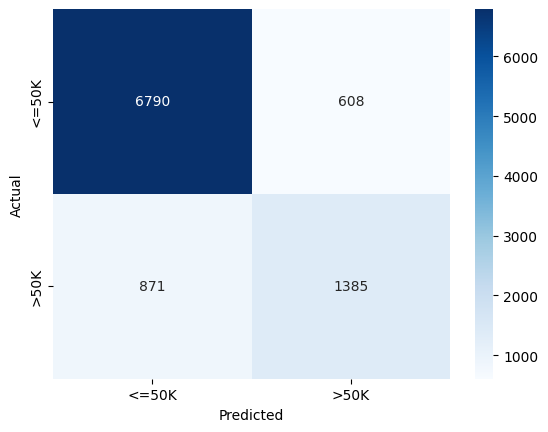

<Figure size 800x600 with 0 Axes>

In [11]:
# Generate confusion matrix
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.figure(figsize = (8,6))

#### With over-sampling of data

In [12]:
from imblearn.over_sampling import SMOTE

# Over sampling applying only for the training dataset
# Apply SMOTE for oversampling
smote = SMOTE(random_state=69)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [13]:
random_forest_classifier_oversample = RandomForestClassifier(random_state=69)

# Train the classifier on the resampled training data
random_forest_classifier_oversample.fit(X_train_resampled, y_train_resampled)

# prediction
y_pred = random_forest_classifier_oversample.predict(X_test)

#### Evaluation Matrix and Classification Report over-sampled model

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8395483737310959


In [15]:
# Print classification report
print("Classification Report:")

actual_classes = [classes[x] for x in y_test]
predicted_classes = [classes[x] for x in y_pred]

report_dict = classification_report(actual_classes, predicted_classes, output_dict=True)
classification_df = pd.DataFrame(report_dict)
classification_df

Classification Report:


,<=50K,>50K,accuracy,macro avg,weighted avg
precision,0.893872,0.658591,0.839548,0.776232,0.838890
recall,0.897134,0.650709,0.839548,0.773922,0.839548
f1-score,0.895500,0.654627,0.839548,0.775063,0.839212
support,7398.000000,2256.000000,0.839548,9654.000000,9654.000000


Confusion Matrix:


<Figure size 800x600 with 0 Axes>

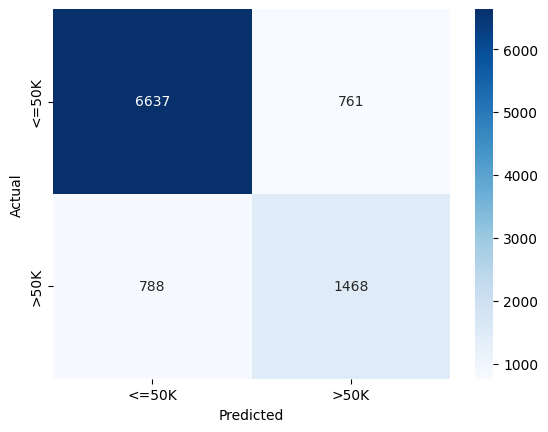

<Figure size 800x600 with 0 Axes>

In [16]:
# Generate confusion matrix
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.figure(figsize = (8,6))

#### Saving the random forest model

In [17]:
from joblib import dump

# Save Random Forest model
dump(random_forest_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']